In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
data = {
    'Experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [40000, 42000, 44000, 48000, 50000, 54000, 56000, 58000, 62000, 65000]
}


In [ ]:
X = np.array(data['Experience'])
y = np.array(data['Salary'])
X = np.c_[np.ones(X.shape[0]), X]

In [ ]:
def least_squares(X, y):
    # Normal Equation: theta = (X^T * X)^(-1) * X^T * y
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

# Get the parameters (theta values) using least squares
theta_ls = least_squares(X, y)
print("Least Squares (Normal Equation) - Parameters:", theta_ls)


Least Squares (Normal Equation) - Parameters: [36466.66666667  2806.06060606]


In [ ]:
def gradient_descent(X, y, alpha=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    cost_history = []

    for i in range(iterations):
        prediction = X @ theta
        error = prediction - y
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)

        # Update the parameters (theta)
        theta -= (alpha/m) * X.T @ error

    return theta, cost_history

# Apply gradient descent to fit the model
theta_gd, cost_history = gradient_descent(X, y)

print("\nGradient Descent - Parameters:", theta_gd)




Gradient Descent - Parameters: [32148.27009915  3426.3574678 ]


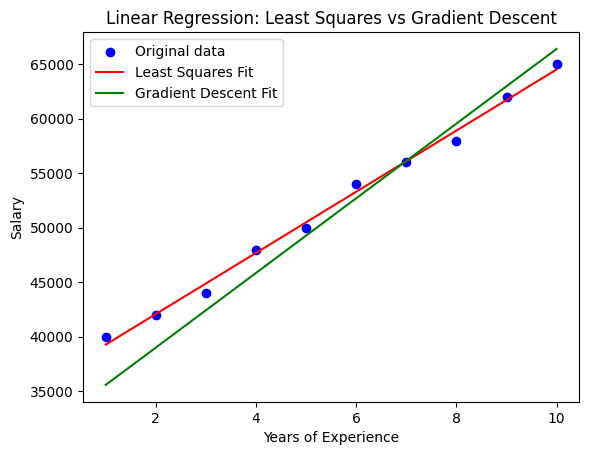

In [ ]:
plt.scatter(data['Experience'], data['Salary'], color='blue', label='Original data')

# Predicted values using Least Squares
y_pred_ls = X @ theta_ls
plt.plot(data['Experience'], y_pred_ls, color='red', label='Least Squares Fit')

# Predicted values using Gradient Descent
y_pred_gd = X @ theta_gd
plt.plot(data['Experience'], y_pred_gd, color='green', label='Gradient Descent Fit')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Least Squares vs Gradient Descent')
plt.legend()
plt.show()


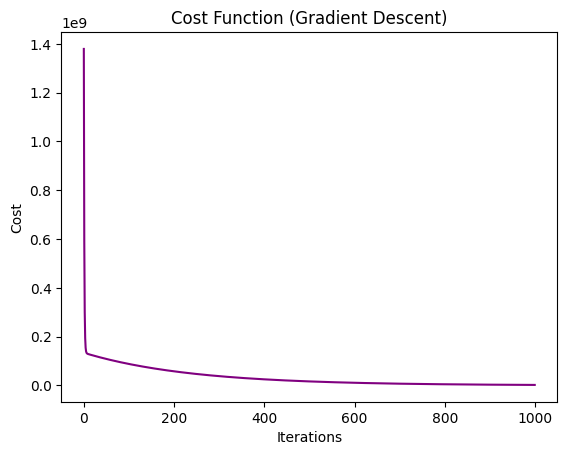

In [ ]:
plt.plot(range(len(cost_history)), cost_history, color='purple')
plt.title('Cost Function (Gradient Descent)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
